# Initial EDA of Reddit Parking Searches of All LA Parking Dataset

Michael Gonzalez

This EDA has three methods on display. The first method uses a simple TF-IDF transformer and count vectorizer. The second method uses TF-IDF vectorizer with KMeans clustering. The third method used similar steps taken to Greg Pawin's inital EDA, which follows the n-grams method. I did a preliminary term search in the file to see, which terms would be useful. I used the terms in creating useful visualizations. Comparing the three methods, I would think that the third method is the best one at the moment.

# Loading libraries and setting the directory

In [1]:
# Import the needed libraries and setting up the directory.
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import os
from typing import Union
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

PROJECT_DIR = Path(os.path.abspath('')).resolve().parents[0]

In [2]:
# Downloading the need NLTK libaries for this EDA.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Looking at the raw data

In [3]:
# Making the path of the raw data readable for All los_angeles_parking.
all_la_pk = pd.read_json(PROJECT_DIR / 'data/raw/ALLlos_angeles_parking.json')

# Displaying 
all_la_pk.head()

,title,permalink,selftext,upvote_ratio,url,votes
0,Los Angeles Parking,/r/InfrastructurePorn/comments/kmnz7a/los_ange...,,0.89,https://live.staticflickr.com/671/20634765414_...,828
1,r/infrastructureporn posts a pic of Dodger Sta...,/r/LosAngeles/comments/kmw254/rinfrastructurep...,,0.80,https://www.reddit.com/r/InfrastructurePorn/co...,14
2,Bags of U.S. mail being dumped in a Los Angele...,/r/PublicFreakout/comments/iok0kk/bags_of_us_m...,,0.92,https://mobile.twitter.com/CBSNews/status/1303...,125
3,Police Chase Ends in Watts/South Los Angeles P...,/r/PoliceChases/comments/jw3106/police_chase_e...,,1.00,https://www.youtube.com/watch?v=iL1cKjqxHOo&fe...,7
4,Police Chase Ends in Watts/South Los Angeles P...,/r/CarAndMotorcycleCrash/comments/jw2z29/polic...,,0.75,https://www.youtube.com/watch?v=iL1cKjqxHOo&fe...,2


# A Simple Method with TF-IDF Transformer & Count Vectorizer

In [4]:
# Using TF-IDF Transformer and Count Vectorizer for word counts.
tfIdfTransformer = TfidfTransformer(use_idf = True)
countVectorizer = CountVectorizer()
wordCount = countVectorizer.fit_transform(all_la_pk['title'])
newTfIdf = tfIdfTransformer.fit_transform(wordCount)

# Creating a new Data Frame from the results of Count Vectorizer.
sim_df = pd.DataFrame(newTfIdf[0].T.todense(), index = countVectorizer.get_feature_names(), columns = ["TF-IDF"])
sim_df = sim_df.sort_values('TF-IDF', ascending = False)


# Result of Simple Method

In [5]:
# Printing the result from the simple method.
print(sim_df.head(10))

           TF-IDF
parking  0.757298
angeles  0.461790
los      0.461790
playing  0.000000
police   0.000000
pointed  0.000000
plunges  0.000000
please   0.000000
plaza    0.000000
plays    0.000000


# Data Visualization of Simple Method

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9621b65c10>],
      dtype=object)

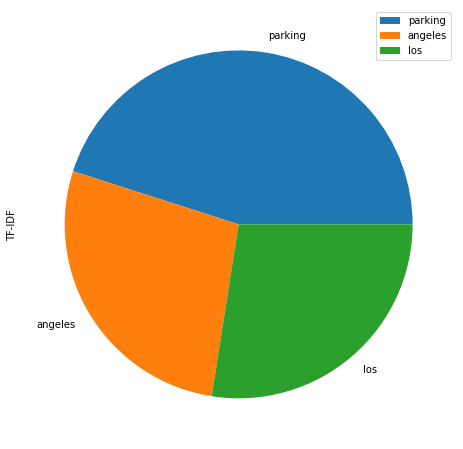

In [6]:
# Displaying a pie chart of the simple method result.
sim_df.plot(kind = 'pie', subplots = True, figsize=(8, 8))

# The TF-IDF with KMeans Method 

In [7]:
# Extracting the keywords from the dataset.
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

tfidf.fit(all_la_pk.title)
text = tfidf.transform(all_la_pk.title)

# Settiong the clusters for the next process.
clusters = MiniBatchKMeans(n_clusters = 14, init_size = 1024, batch_size = 2048, random_state = 20).fit_predict(text)

# Result of TF-IDF with KMeans Method

In [8]:
# Displaying the Top 20 keywords from each cluster.
def get_top_keywords(all_la_pk, clusters, labels, n_terms):
    la_df = pd.DataFrame(all_la_pk.todense()).groupby(clusters).mean()
    
    for i,r in la_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms : ]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 20)


Cluster 0
county,chase,woman,department,garage,enforcement,died,ends,echo,covid,angeles,los,national,park,plunges,25,feet,drainage,pipe,teen

Cluster 1
car,chase,harrison,city,covid,department,died,drainage,ends,enforcement,feet,garage,george,county,woman,echo,police,angeles,los,park

Cluster 2
county,covid,city,enforcement,garage,feet,ends,echo,woman,died,department,drainage,bureau,parks,la,car,los,angeles,parking,ticket

Cluster 3
department,died,drainage,echo,enforcement,feet,19,2004,video,los,angeles,parking,lot,police,south,ends,chase,watts,november,16

Cluster 4
car,chase,harrison,county,department,died,drainage,echo,ends,feet,garage,george,covid,woman,city,park,enforcement,angeles,los,parking

Cluster 5
echo,25,feet,garage,2004,george,drainage,beatle,enforcement,ends,parks,california,county,city,la,home,safer,covid,19,megathread

Cluster 6
city,harrison,woman,feet,died,george,drainage,garage,echo,ends,enforcement,department,covid,like,county,car,los,angeles,parking,lot

Cluster

# Data Visualization of TF-IDF with KMeans Method

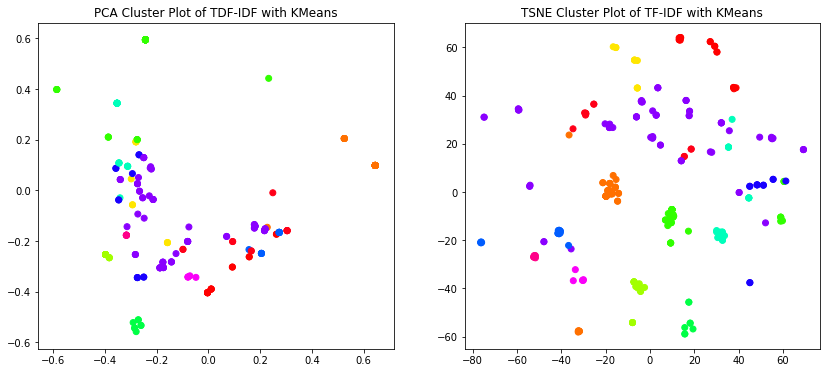

In [9]:
# Displaying the Principle Component Analysis and T-Distributed Stochastic Neighbor Embedding Plots.
def plot_tsne_pca(all_la_pk, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(all_la_pk.shape[0]), size = 3000, replace = True)
    
    pca = PCA(n_components = 2).fit_transform(all_la_pk[max_items, : ].todense())
    tsne = TSNE().fit_transform(PCA(n_components = 50).fit_transform(all_la_pk[max_items, : ].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size = 300, replace = True)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i / max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize = (14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c = label_subset)
    ax[0].set_title('PCA Cluster Plot of TDF-IDF with KMeans')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c = label_subset)
    ax[1].set_title('TSNE Cluster Plot of TF-IDF with KMeans')
    
plot_tsne_pca(text, clusters)

# The Bi and Tri Grams Method 

# Creating a list of bi-grams and tri-grams 

In [10]:
# Function that creates list of bi-grams or tri-grams.
def create_grams(input_file: Union[str, Path], gram: str = 'bi') -> list: 
    
    # Reading the file into a data frame.
    df = pd.read_json(input_file)

    # Combine the title and self_text of dataframe.
    df['title_selftext'] = df['title'] + df['selftext']

    # Change all words into lowercase.
    df['title_selftext'] = df['title_selftext'].apply(lambda x: x.lower())

    # Tokenize the data frame.
    df['tokens'] = df.title_selftext.apply(lambda x: 
            nltk.RegexpTokenizer(r'\w+').tokenize(x))

    # Removing stop words and lemmatize using WordNetLemmatizer.
    wnl = WordNetLemmatizer()
    df['tokens'] = df['tokens'].apply(lambda x: [wnl.lemmatize(w) 
            for w in x if not w in stop_words])

    # Apply bigram, trigram, or error.
    if gram =='bi':
        df['grams'] = df['tokens'].apply(nltk.bigrams)
    elif gram =='tri':
        df['grams'] = df['tokens'].apply(nltk.trigrams)
    else:
        raise NameError('Only bi or tri allowed')

    # Return combined list of bi-grams.
    return [' '.join(item) for sublist in df.grams for item in sublist]



# Result of bi-grams for Parking search term

In [11]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('parking')].value_counts()
biggram_counts[:10]

angeles parking        94
parking enforcement    92
parking lot            87
parking regulation     34
relaxed parking        27
parking fine           23
parking ticket         22
parking garage         22
parking violation      19
parking restriction    19
dtype: int64

# Result of tri-grams for Parking search term

In [12]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('parking')].value_counts()
trigram_counts[:10]

los angeles parking            94
angeles parking lot            24
angeles parking enforcement    20
parking enforcement http       19
relaxed parking enforcement    19
relaxes parking enforcement    13
parking lot november           13
parking fine increase          12
west hollywood parking         12
vehicle overnight parking      12
dtype: int64

# Data Visualizations for Parking search term

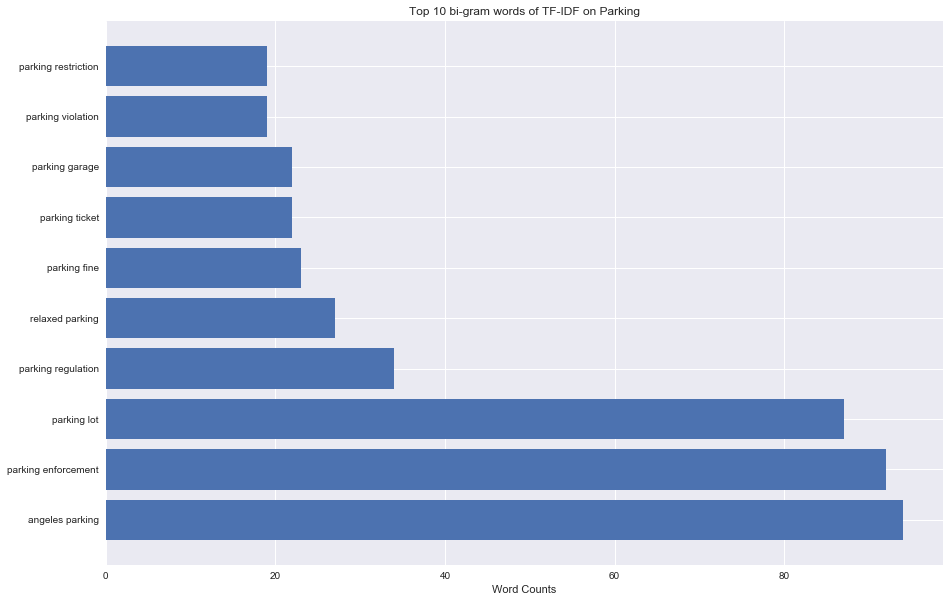

In [13]:
# Displaying a matplotlib bar chart from bi-grams word counts for parking.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Parking')
plt.show()

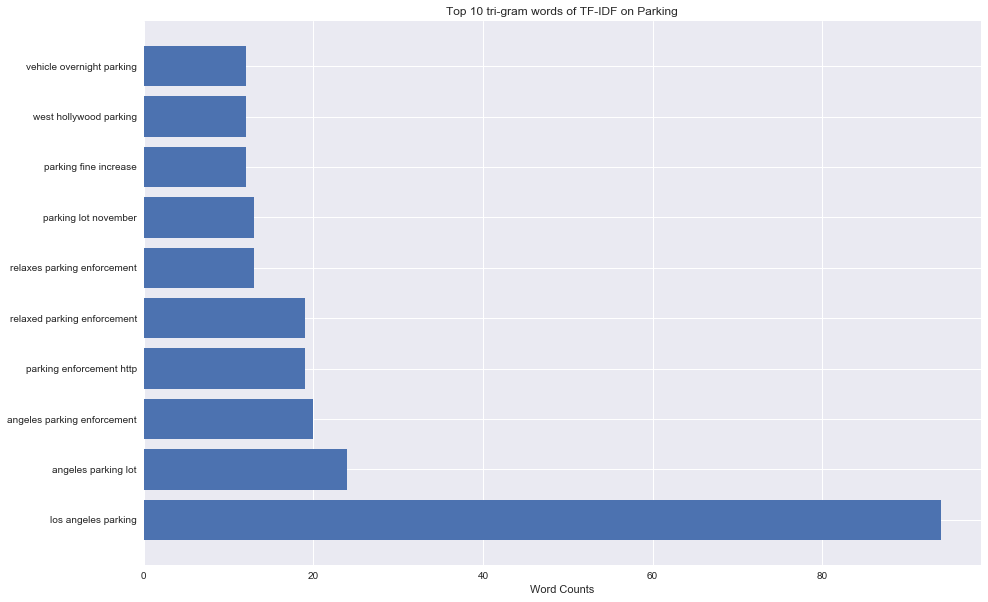

In [14]:
# Displaying a matplotlib bar chart from tri-grams word counts for parking.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Parking')
plt.show()

# Result of bi-grams for Enforcement search term

In [15]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('enforcement')].value_counts()
biggram_counts[:10]

parking enforcement       92
relaxed enforcement       39
enforcement http          19
law enforcement           15
enforcement maintained    11
enforcement around        11
enforcement place         11
extension enforcement     11
enforcement street        11
enforcement across        11
dtype: int64

# Result of tri-grams for Enforcement search term

In [16]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('enforcement')].value_counts()
trigram_counts[:10]

angeles parking enforcement         20
enforcement http www                19
relaxed parking enforcement         19
parking enforcement http            19
relaxes parking enforcement         13
extension enforcement maintained    11
relaxed enforcement street          11
enforcement around closed           11
enforcement maintained operation    11
enforcement across city             11
dtype: int64

# Data Visualizations for Enforcement search term

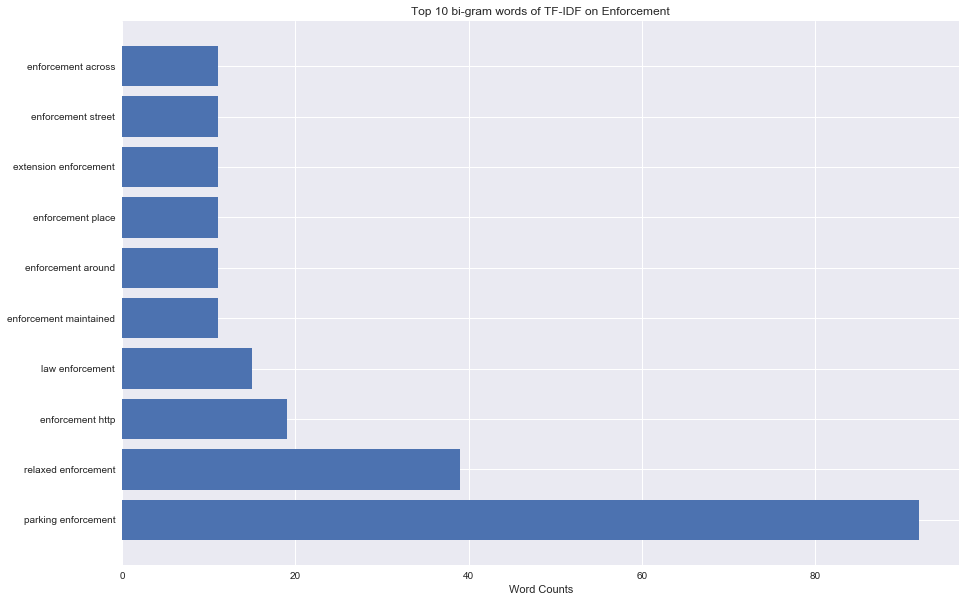

In [17]:
# Displaying a matplotlib bar chart from bi-grams word counts for enforcement.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Enforcement')
plt.show()

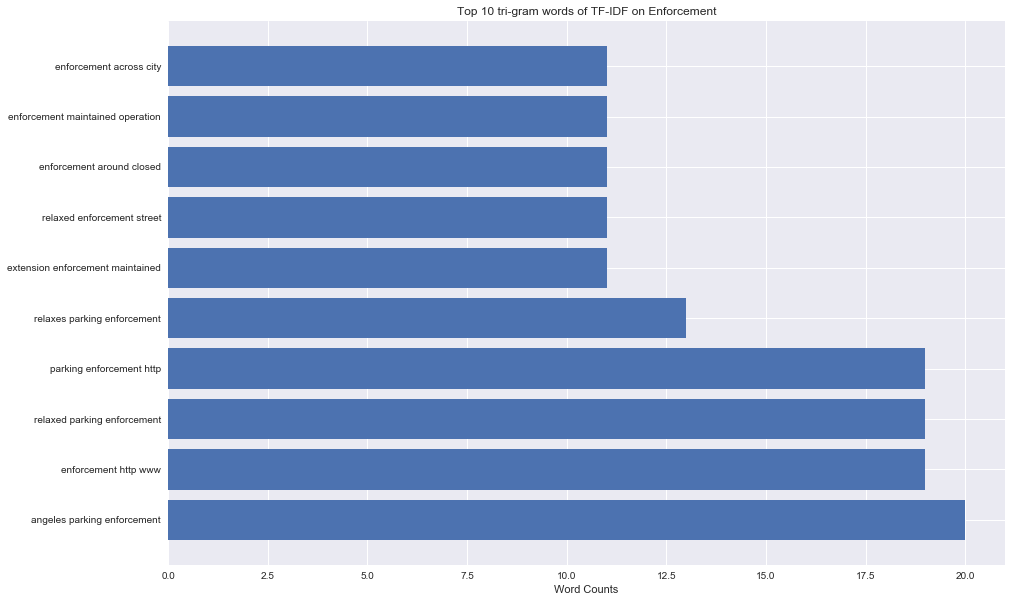

In [18]:
# Displaying a matplotlib bar chart from tri-grams word counts for enforcement.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Enforcement')
plt.show()

# Result of bi-grams for Ticket search term

In [19]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('ticket')].value_counts()
biggram_counts[:10]

parking ticket          22
season ticket           17
ticketmaster mlbam      15
moratorium ticketing    11
ticketing towing        11
pay ticket              11
group ticket            10
none ticketmaster        9
ticketmaster toronto     9
purchase ticket          9
dtype: int64

# Result of tri-grams for Ticket search term

In [20]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('ticket')].value_counts()
trigram_counts[:10]

ticketmaster mlbam toronto      13
moratorium ticketing towing     11
school moratorium ticketing     11
ticketing towing abandoned      11
ticketmaster toronto blue        9
ticket secondary marketplace     7
jay mlbam ticketmaster           7
ticket group manager             5
angeles parking ticket           5
none ticketmaster mlbam          5
dtype: int64

# Data Visualizations for Ticket search term

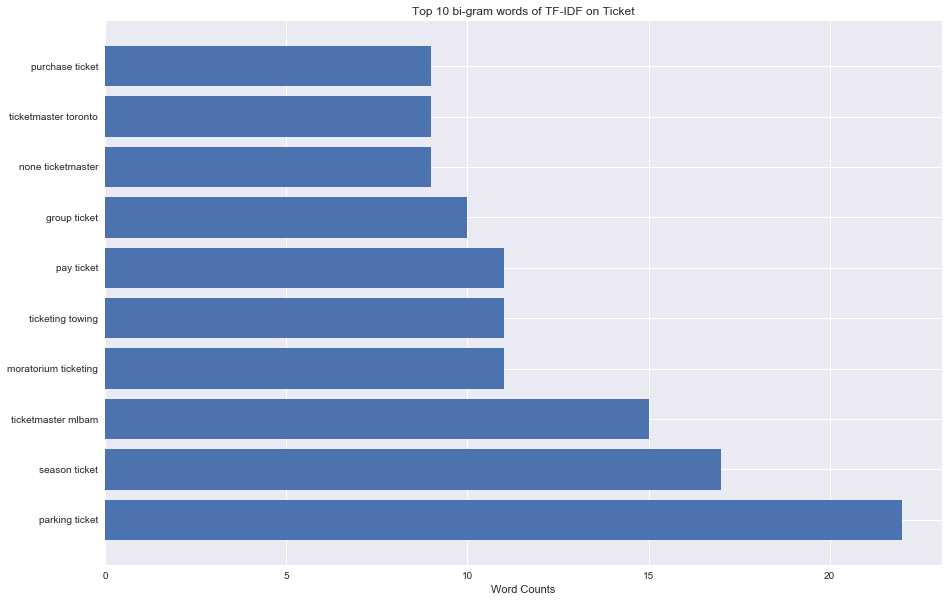

In [21]:
# Displaying a matplotlib bar chart from bi-grams word counts for ticket.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Ticket')
plt.show()

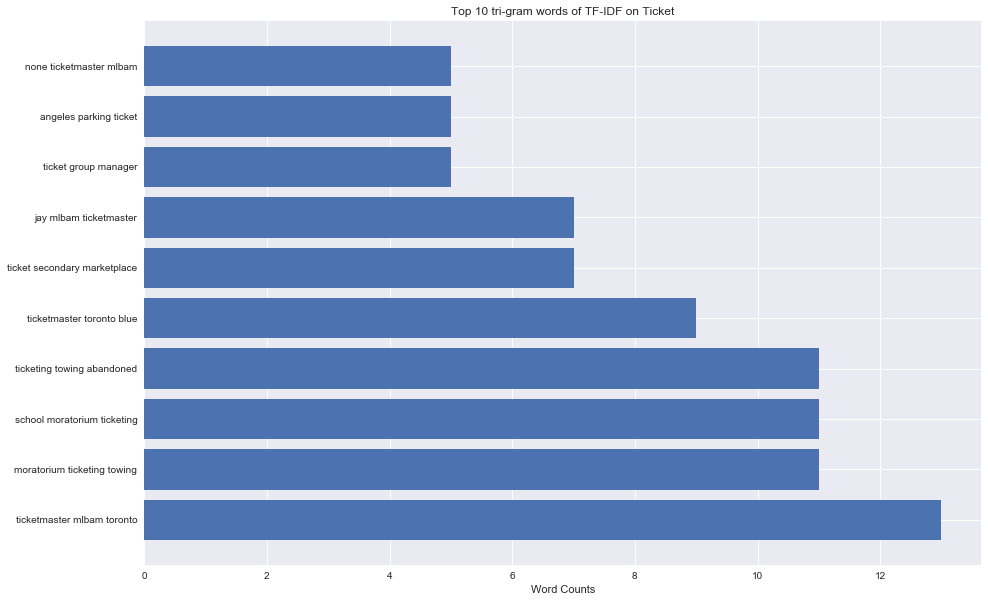

In [22]:
# Displaying a matplotlib bar chart from tri-grams word counts for ticket.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Ticket')
plt.show()

# Result of bi-grams for Citation search term

In [23]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('citation')].value_counts()
biggram_counts[:10]

citation needed       16
several citation      11
citation angelenos    11
parking citation       3
contest citation       2
appeal citation        2
pay citation           2
fine citation          2
ticket citation        2
citation double        1
dtype: int64

# Result of tri-grams for Citation search term

In [24]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('citation')].value_counts()
trigram_counts[:10]

citation angelenos effectively     11
issuance several citation          11
several citation angelenos         11
citation needed enron               5
citation needed company             2
avoid fine citation                 2
audit citation needed               1
confirmed citation properly         1
citation needed girard              1
citation request administrative     1
dtype: int64

# Data Visualizations for Citation search term

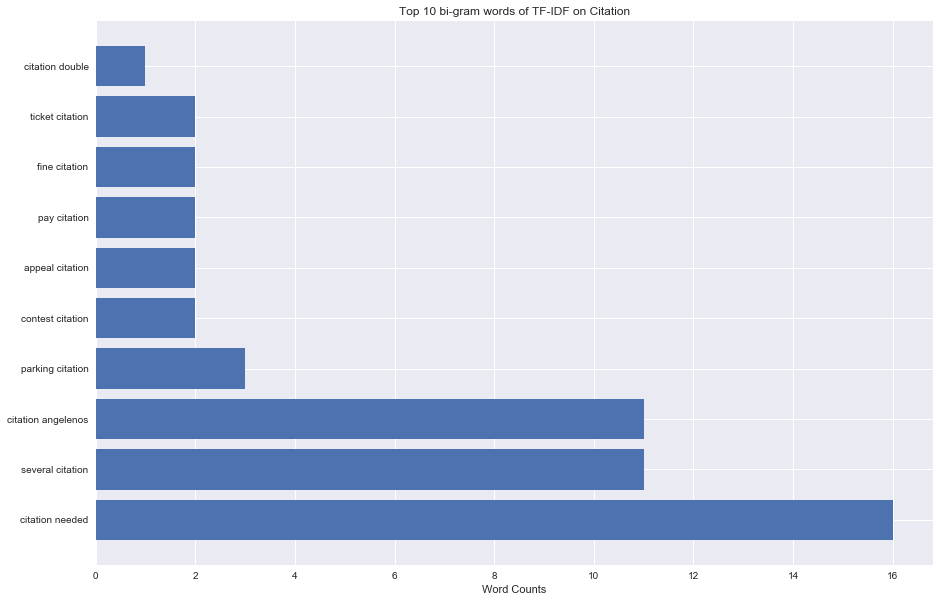

In [25]:
# Displaying a matplotlib bar chart from bi-grams word counts for citation.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Citation')
plt.show()

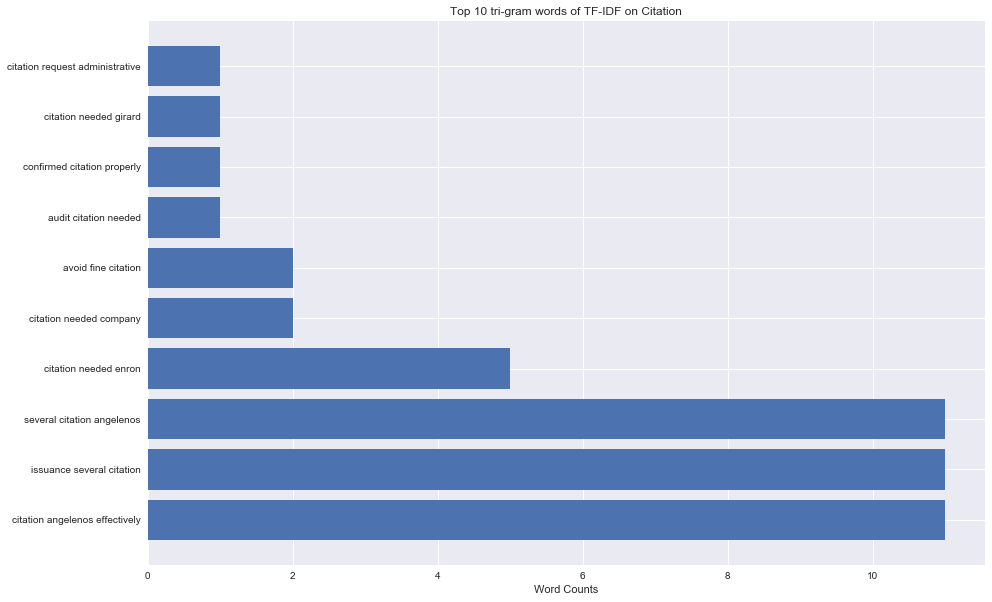

In [26]:
# Displaying a matplotlib bar chart from tri-grams word counts for citation.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Citation')
plt.show()

# Result of bi-grams for Violation search term

In [27]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('violation')].value_counts()
biggram_counts[:10]

parking violation      19
violation bureau       10
violation mail          2
nightclub violation     2
violation liquor        2
firework violation      2
angeles violation       2
violation rendering     2
moving violation        2
sign violation          2
dtype: int64

# Result of tri-grams for Violation search term

In [28]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('violation')].value_counts()
trigram_counts[:10]

angeles parking violation         10
parking violation bureau          10
violation bureau want              2
los angeles violation              2
violation state firework           2
dangerous firework violation       2
restaurant nightclub violation     2
ticket moving violation            2
violation liquor license           2
parking violation hand             2
dtype: int64

# Data Visualizations for Violation search term

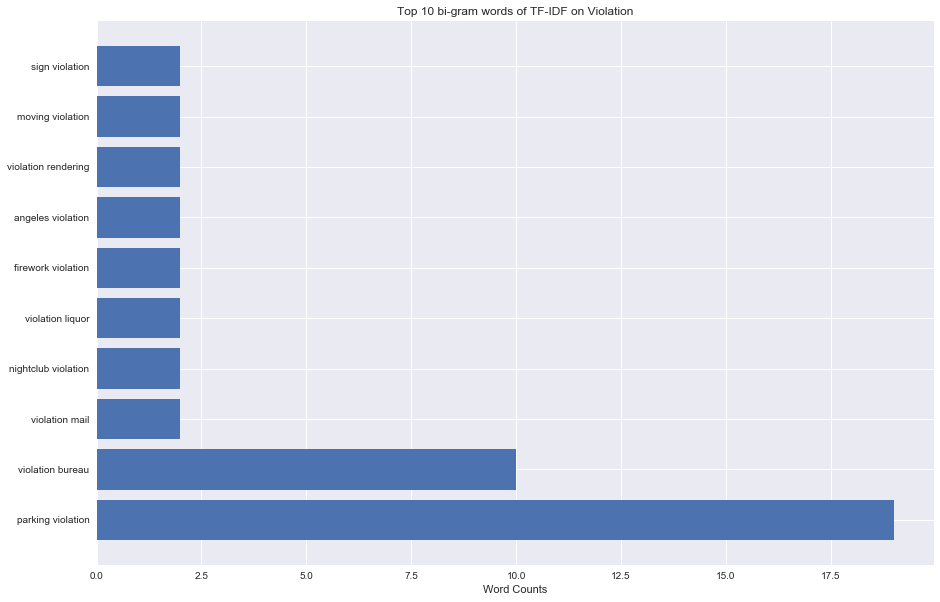

In [29]:
# Displaying a matplotlib bar chart from bi-grams word counts for violation.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Violation')
plt.show()

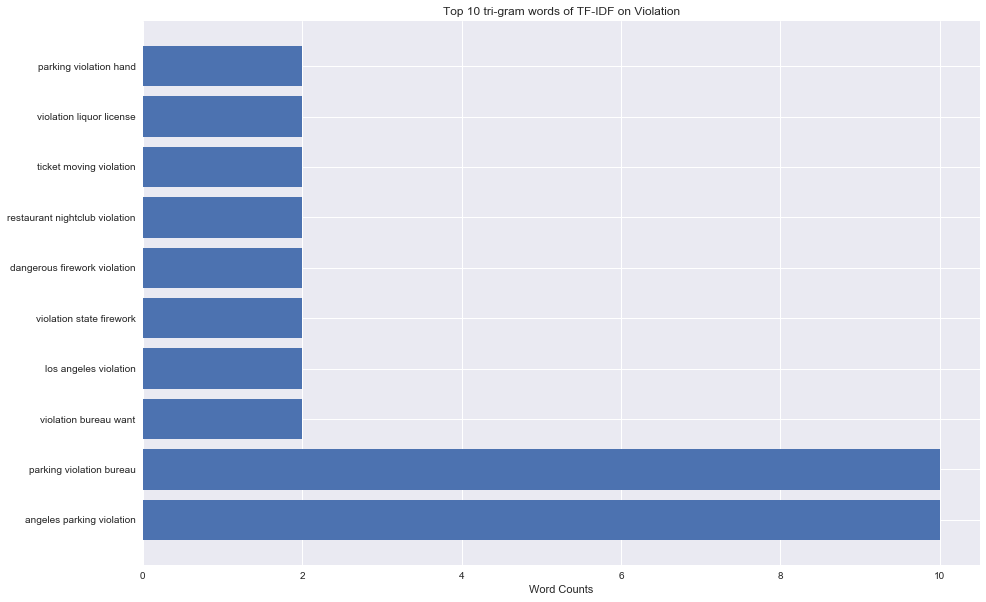

In [30]:
# Displaying a matplotlib bar chart from tri-grams word counts for violation.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Violation')
plt.show()

# Result of bi-grams for Meter search term

In [31]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('meter')].value_counts()
biggram_counts[:10]

parking meter        14
metered space        12
continue metered     12
meter parking         9
park meter            7
meter amount          6
right barometer       2
meter apart           2
barometer project     2
two meter             2
dtype: int64

# Result of tri-grams for Meter search term

In [32]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('meter')].value_counts()
trigram_counts[:10]

continue metered space     12
also continue metered      11
metered space encourage    11
parking meter parking       9
meter parking specified     8
limit parking meter         8
park meter amount           6
meter amount time           6
monday park meter           3
tomorrow park meter         3
dtype: int64

# Data Visualizations for Meter search term

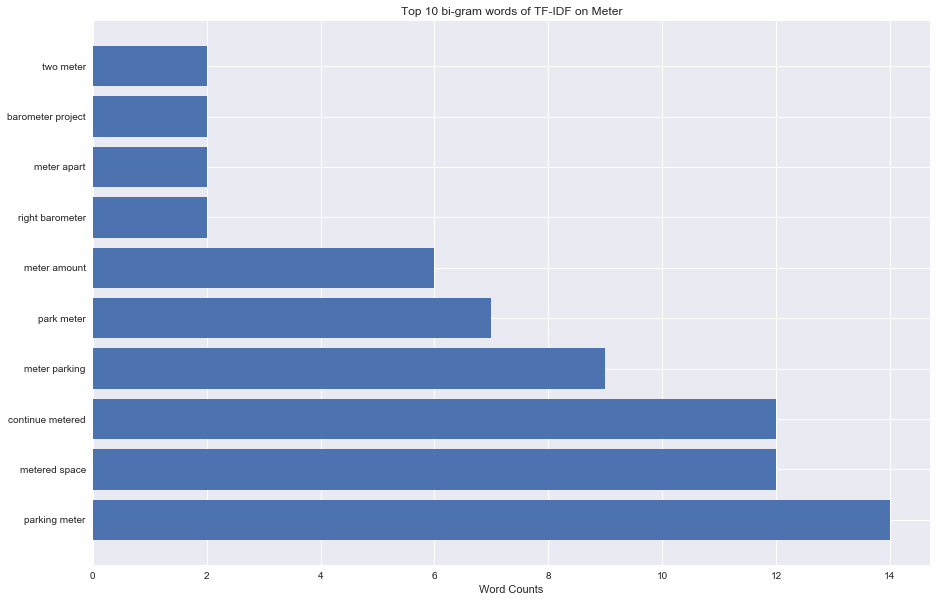

In [33]:
# Displaying a matplotlib bar chart from bi-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Meter')
plt.show()

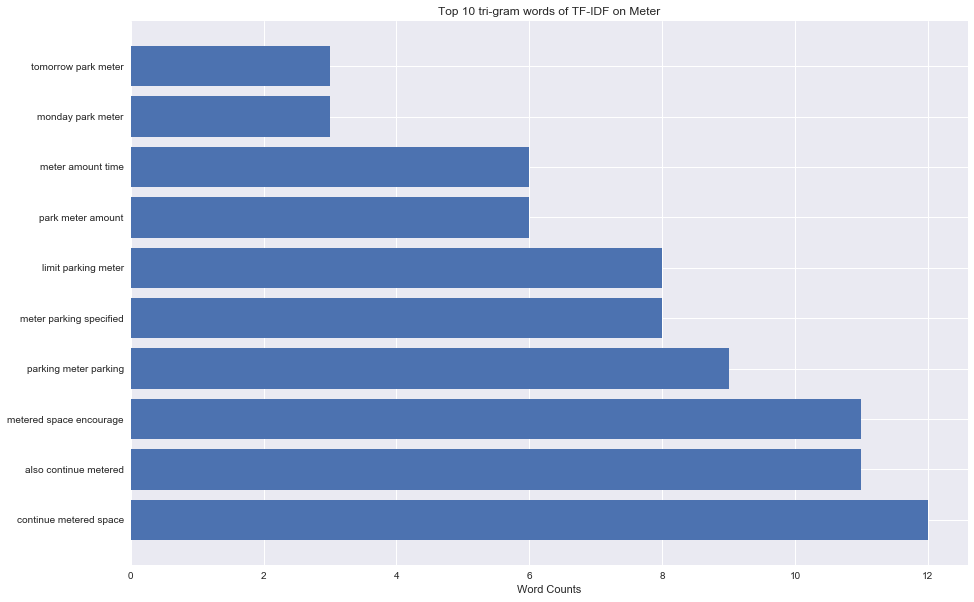

In [34]:
# Displaying a matplotlib bar chart from tri-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Meter')
plt.show()

# Result of bi-grams for Infrastructure search term

In [35]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('infrastructure')].value_counts()
biggram_counts[:10]

critical infrastructure          18
infrastructure sector            12
charging infrastructure          10
infrastructure project            5
infrastructure worker             5
transportation infrastructure     5
crumbling infrastructure          3
infrastructure investment         3
infrastructure critical           2
infrastructure time               2
dtype: int64

# Result of tri-grams for Infrastructure search term

In [36]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('infrastructure')].value_counts()
trigram_counts[:10]

critical infrastructure sector       12
federal critical infrastructure      12
infrastructure sector state           7
critical infrastructure worker        5
essential critical infrastructure     5
infrastructure sector six             5
infrastructure worker http            5
lack charging infrastructure          3
infrastructureporn post pic           2
infrastructure time seriously         2
dtype: int64

# Data Visualizations for Infrastructure search term

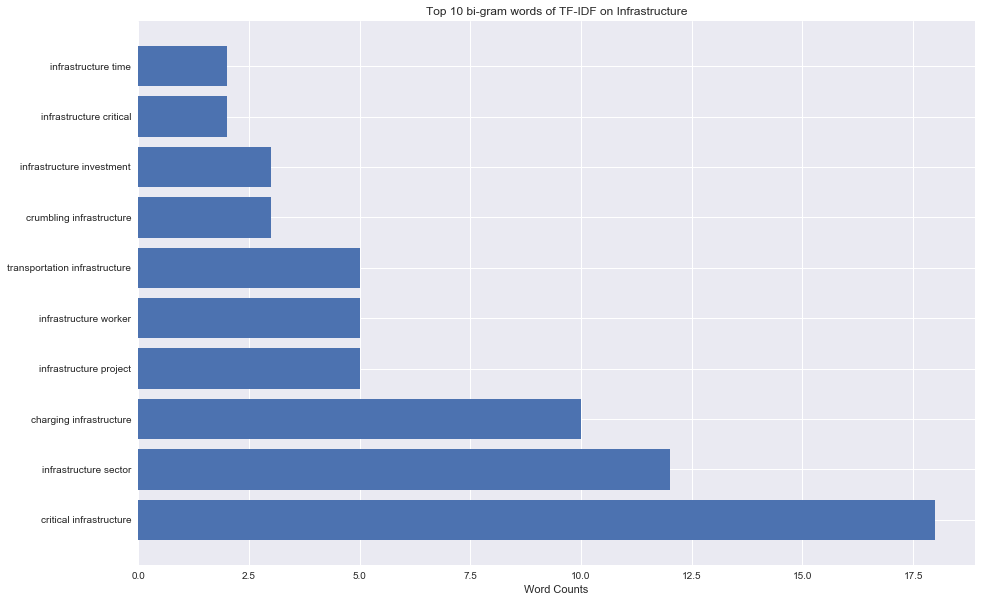

In [37]:
# Displaying a matplotlib bar chart from bi-grams word counts for infrastructure.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Infrastructure')
plt.show()

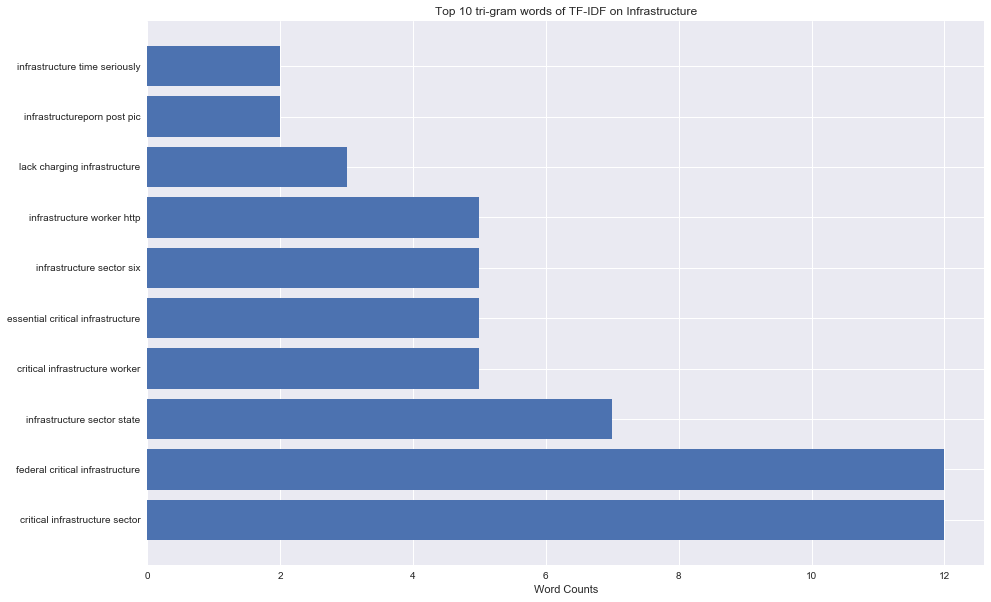

In [38]:
# Displaying a matplotlib bar chart from tri-grams word counts for infrastructure.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Infrastructure')
plt.show()

# Result of bi-grams for Garage search term

In [39]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('garage')].value_counts()
biggram_counts[:10]

parking garage         22
garage fire             3
garage seen             2
garage could            2
private garage          2
police garage           2
garage went             2
local garage            1
garage photographed     1
garage upon             1
dtype: int64

# Result of tri-grams for Garage search term

In [40]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('garage')].value_counts()
trigram_counts[:10]

angeles parking garage       3
parking garage could         2
police garage seen           2
trapped parking garage       2
garage could lecture         2
garage went cigar            2
department private garage    2
private garage went          2
building police garage       1
garage monitor 26            1
dtype: int64

# Data Visualizations for Garage search term

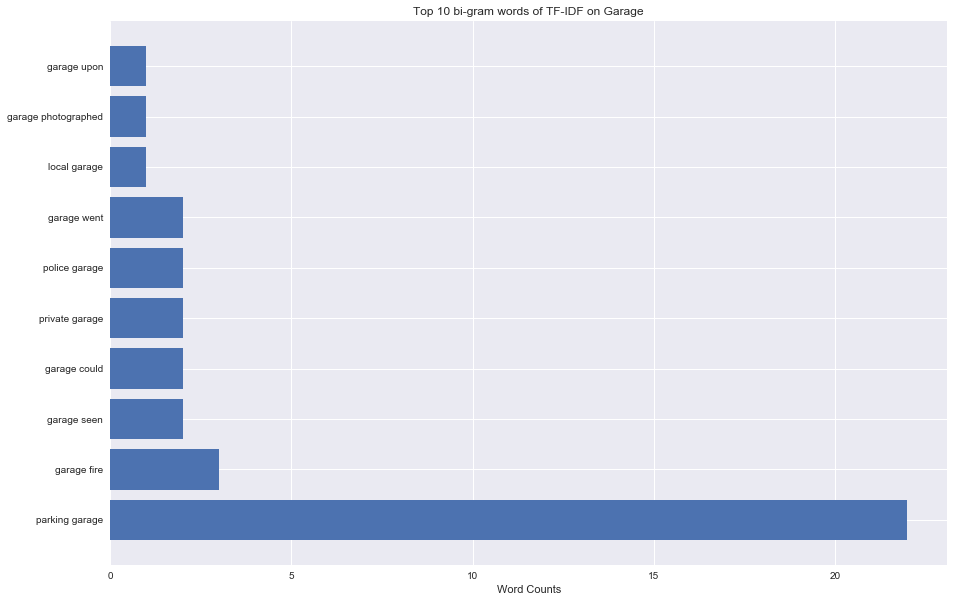

In [41]:
# Displaying a matplotlib bar chart from bi-grams word counts for garage.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Garage')
plt.show()

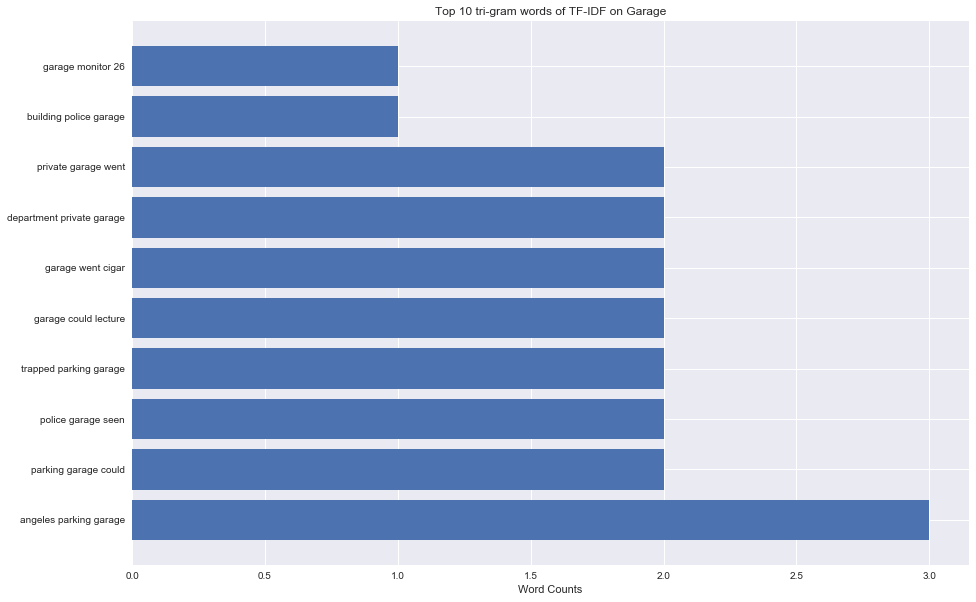

In [42]:
# Displaying a matplotlib bar chart from tri-grams word counts for garage.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Garage')
plt.show()

# Result of bi-grams for Spot search term

In [43]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('spot')].value_counts()
biggram_counts[:10]

parking spot             19
0 spotted                 9
vapor spot                6
playoff spot              6
photo czarsonspotting     6
spotlight uber            4
tech spotlight            4
hot spot                  4
roster spot               4
get spot                  3
dtype: int64

# Result of tri-grams for Spot search term

In [44]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('spot')].value_counts()
trigram_counts[:10]

com photo czarsonspotting    6
driving tech spotlight       4
spotlight uber crash         4
tech spotlight uber          4
car parking spot             3
clinched playoff spot        3
vapor spot hollywood         2
reserved spot department     2
park reserved spot           2
designated parking spot      2
dtype: int64

# Data Visualizations for Spot search term

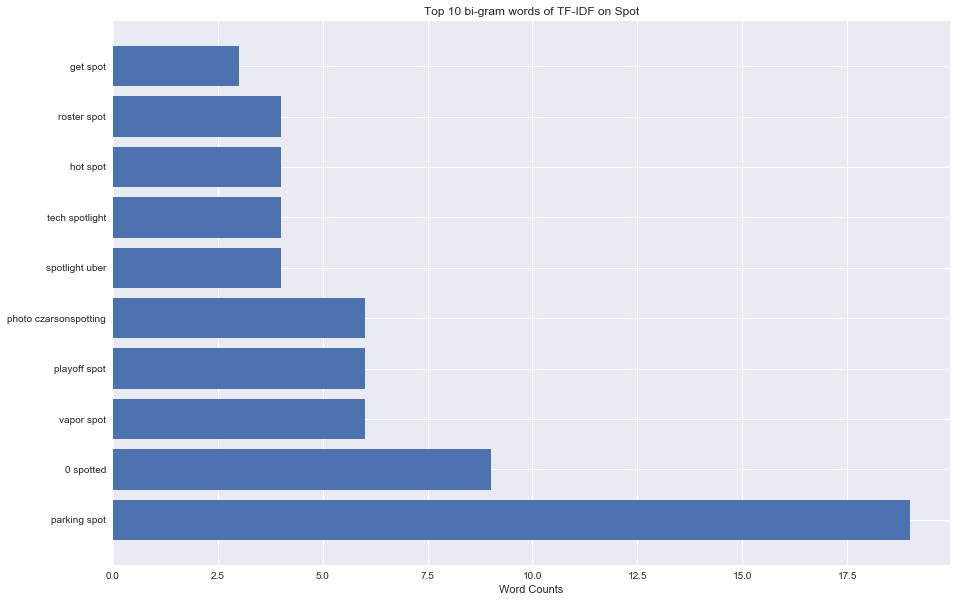

In [45]:
# Displaying a matplotlib bar chart from bi-grams word counts for spot.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Spot')
plt.show()

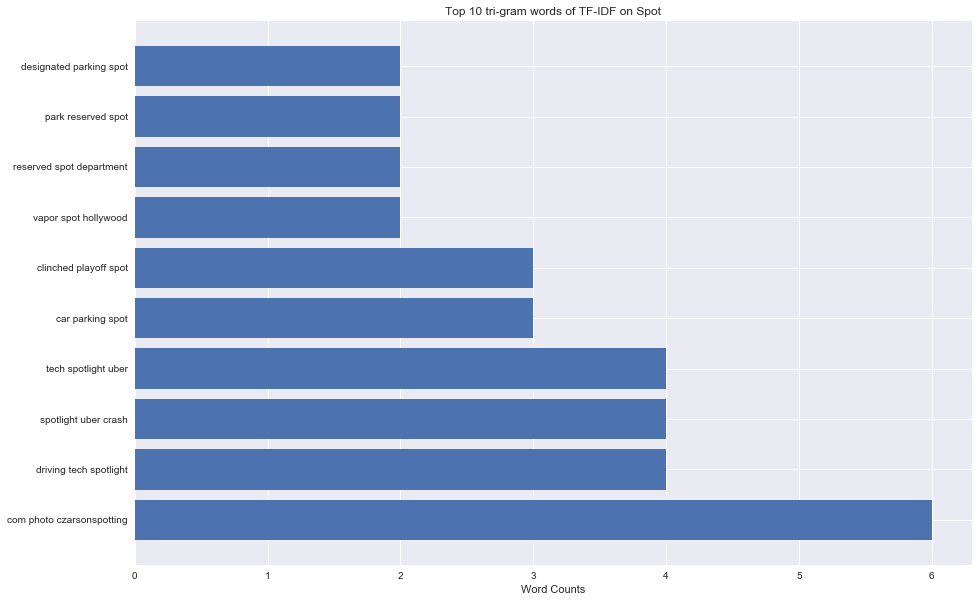

In [46]:
# Displaying a matplotlib bar chart from tri-grams word counts for spot.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Spot')
plt.show()